In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as  pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## Perform EDA

#### 1.checking any missing values

In [5]:
df.isnull().any()

Price        False
Age_08_04    False
KM           False
Fuel_Type    False
HP           False
Automatic    False
cc           False
Doors        False
Cylinders    False
Gears        False
Weight       False
dtype: bool

In [6]:
print(df.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [7]:
df.isna().any()

Price        False
Age_08_04    False
KM           False
Fuel_Type    False
HP           False
Automatic    False
cc           False
Doors        False
Cylinders    False
Gears        False
Weight       False
dtype: bool

#### 2.Checking any duplicte data is present

In [9]:
df[df.duplicated]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


###### Removing the duplicate data

In [11]:
df.drop_duplicates(inplace=True)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#### Process to detect ouliers

Extracting the numnerical data first

In [13]:
num_cols=df._get_numeric_data().columns
num_cols

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

Boxplot before removing outliers

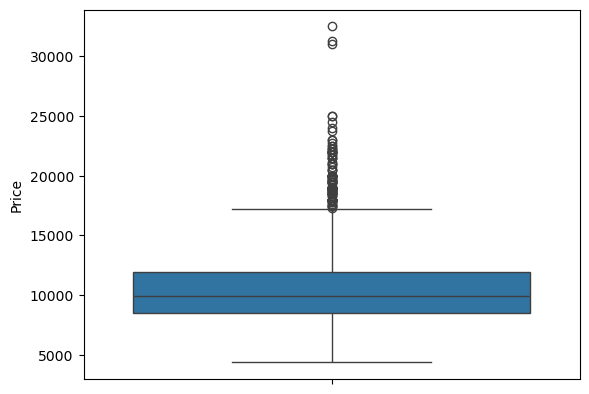

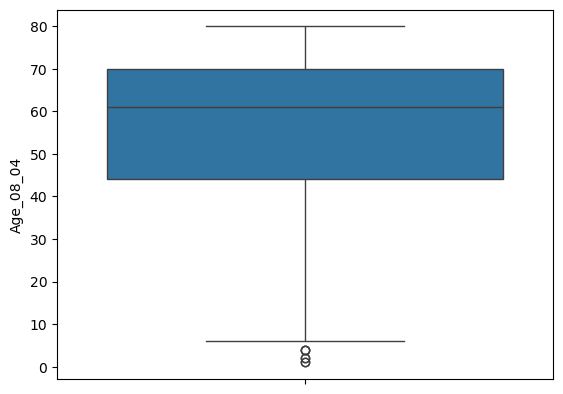

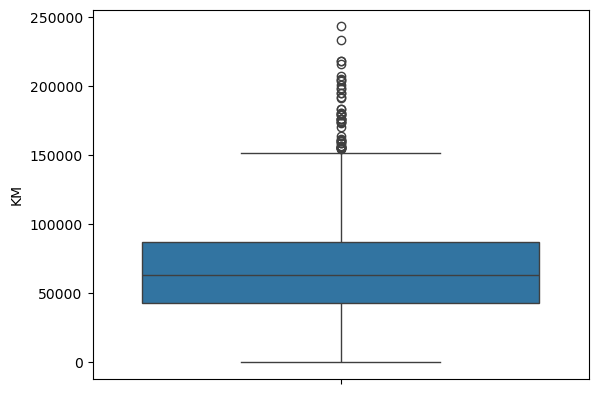

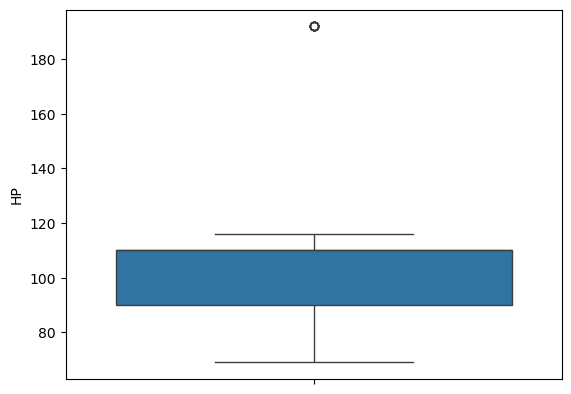

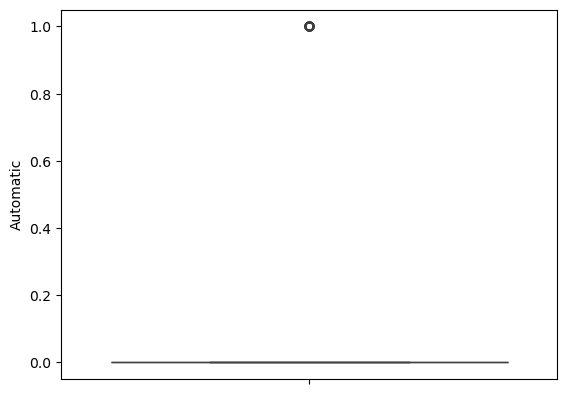

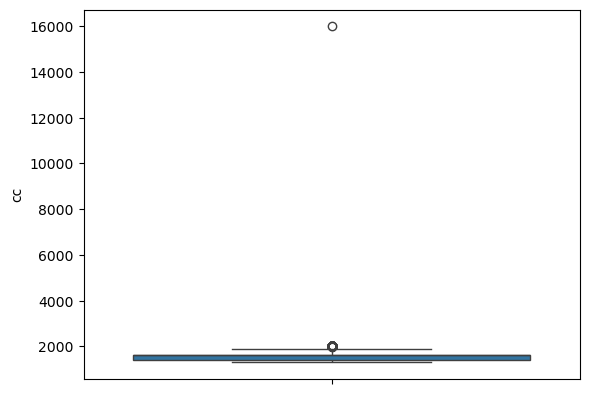

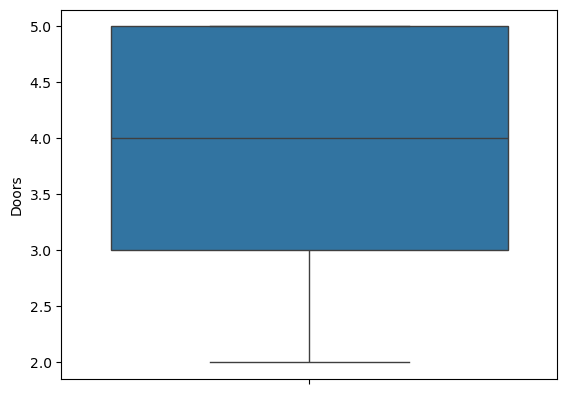

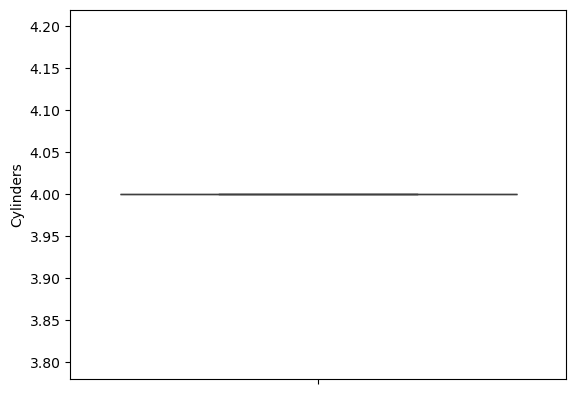

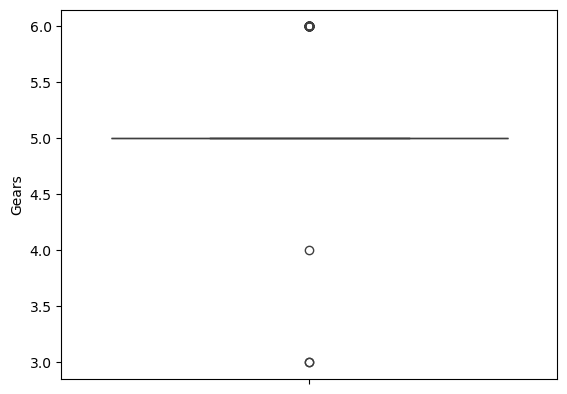

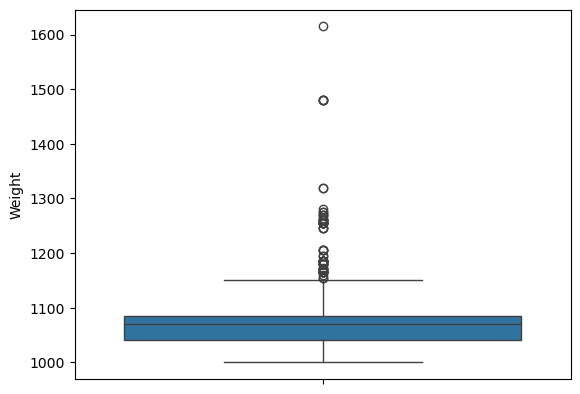

In [15]:
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.ylabel(i)     
    plt.show()

Detecting outliers using IQR

In [17]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [18]:
outliers_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
outliers_mask

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,True,False,False,False,True
4,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False


In [19]:
outliers_count = outliers_mask.sum()
print("Number of outliers per column:")
print(outliers_count)

Number of outliers per column:
Price        109
Age_08_04      7
KM            49
HP            11
Automatic     80
cc           122
Doors          0
Cylinders      0
Gears         46
Weight        65
dtype: int64


In [20]:
outliers_rows = df[outliers_mask.any(axis=1)]
print("Rows containing outliers:")
print(outliers_rows)

Rows containing outliers:
      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1421   8500         78  36000    Petrol   86          1  1300      3   
1423   7950         80  35821    Petrol   86          1  1300      3   
1426   9950         78  30964    Petrol  110          1  1600      3   
1427   8950         71  29000    Petrol   86          1  1300      3   
1429   8950         78  24000    Petrol   86          1  1300      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2         

Dataframe with out outliers is Defined in the variable  
##### df_new

In [22]:

df_new = df[~outliers_mask.any(axis=1)]
df_new

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
22,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


boxplot after removing the outliers

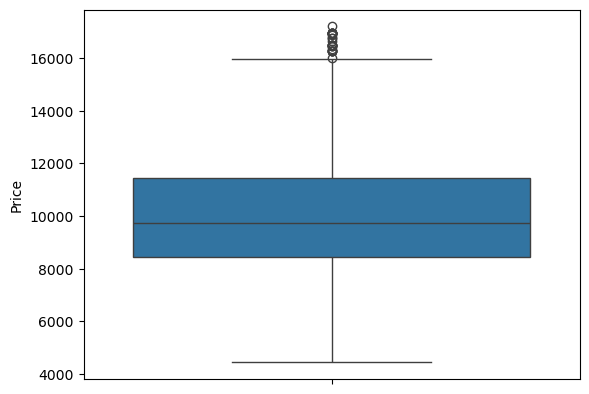

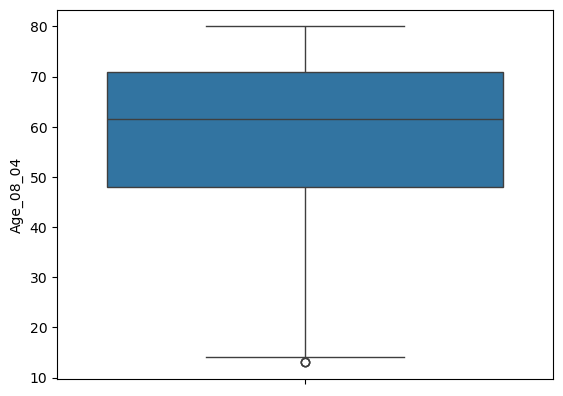

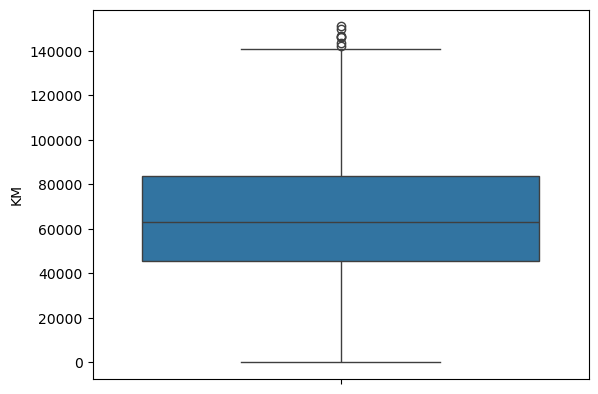

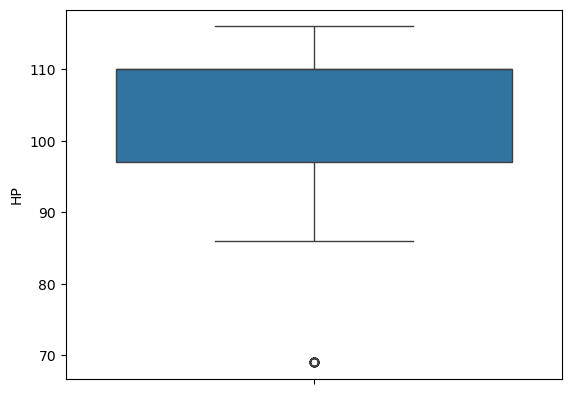

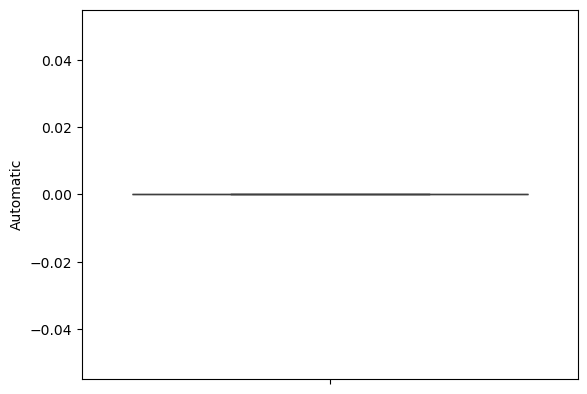

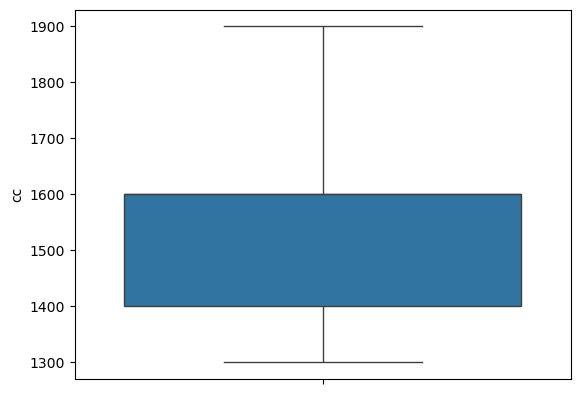

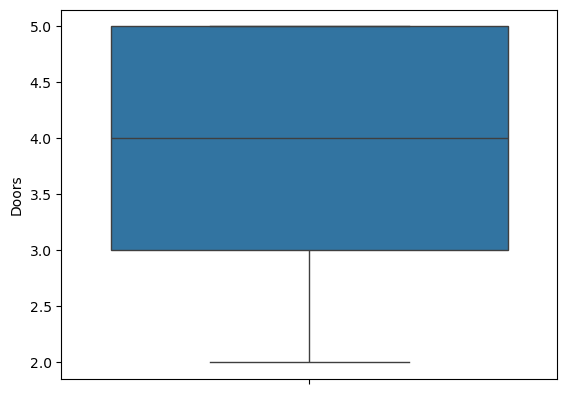

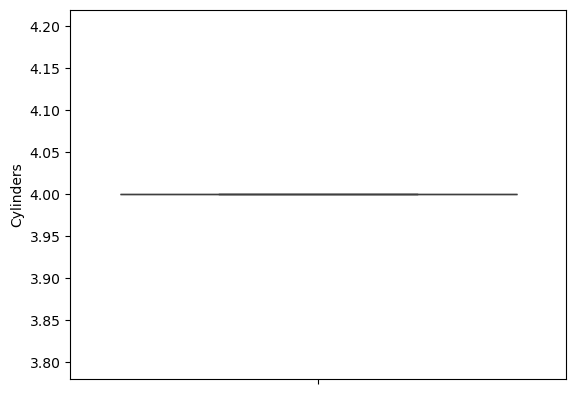

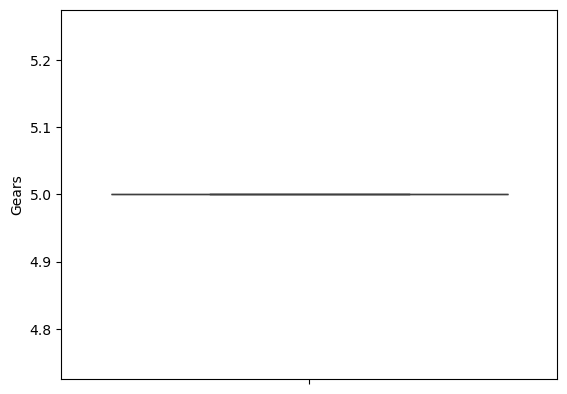

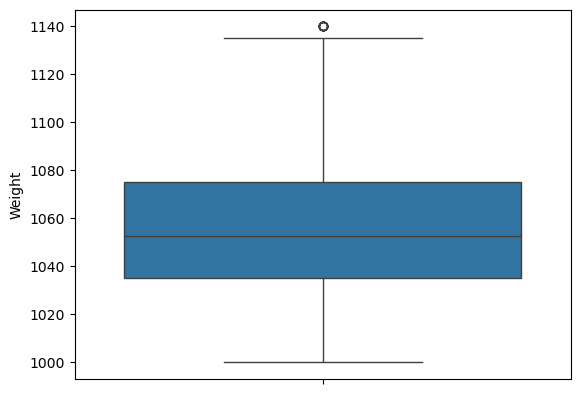

In [24]:
for i in num_cols:
    sns.boxplot(y=df_new[i])
    plt.ylabel(i)     
    plt.show()

#### 4.Perform correlation task

In [26]:
print(df_new.Automatic.unique())
print(df_new.Cylinders.unique())
print(df_new.Gears.unique())
print(df_new.Fuel_Type.unique())

[0]
[4]
[5]
['Diesel' 'Petrol' 'CNG']


In [27]:
corr=df_new[num_cols].corr()

<function matplotlib.pyplot.show(close=None, block=None)>

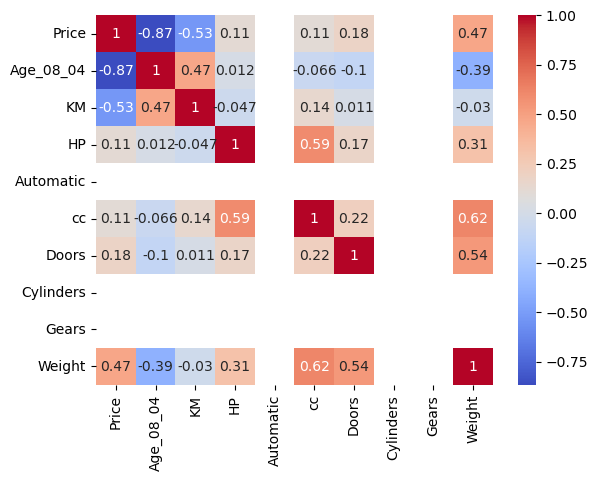

In [28]:
sns.heatmap(corr,annot=True,cmap=plt.cm.coolwarm)
plt.show

### Since Automatic,Cylinder,Gears are low variance data we can drop these column. And if we are keeping threshold as .5, weight and CC are higly correlated. So we can drop any of these columns

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df_new.drop(columns=["Cylinders","Automatic","Gears","Weight"],inplace=True)
df_new

,Price,Age_08_04,KM,Fuel_Type,HP,cc,Doors
9,12950,23,71138,Diesel,69,1900,3
18,16750,24,25563,Petrol,110,1600,3
19,16950,30,64359,Petrol,110,1600,3
20,15950,30,67660,Petrol,110,1600,3
22,15950,28,56349,Petrol,110,1600,3
...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3
1432,10845,72,19000,Petrol,86,1300,3
1433,8500,71,17016,Petrol,86,1300,3
1434,7250,70,16916,Petrol,86,1300,3


### Visualization

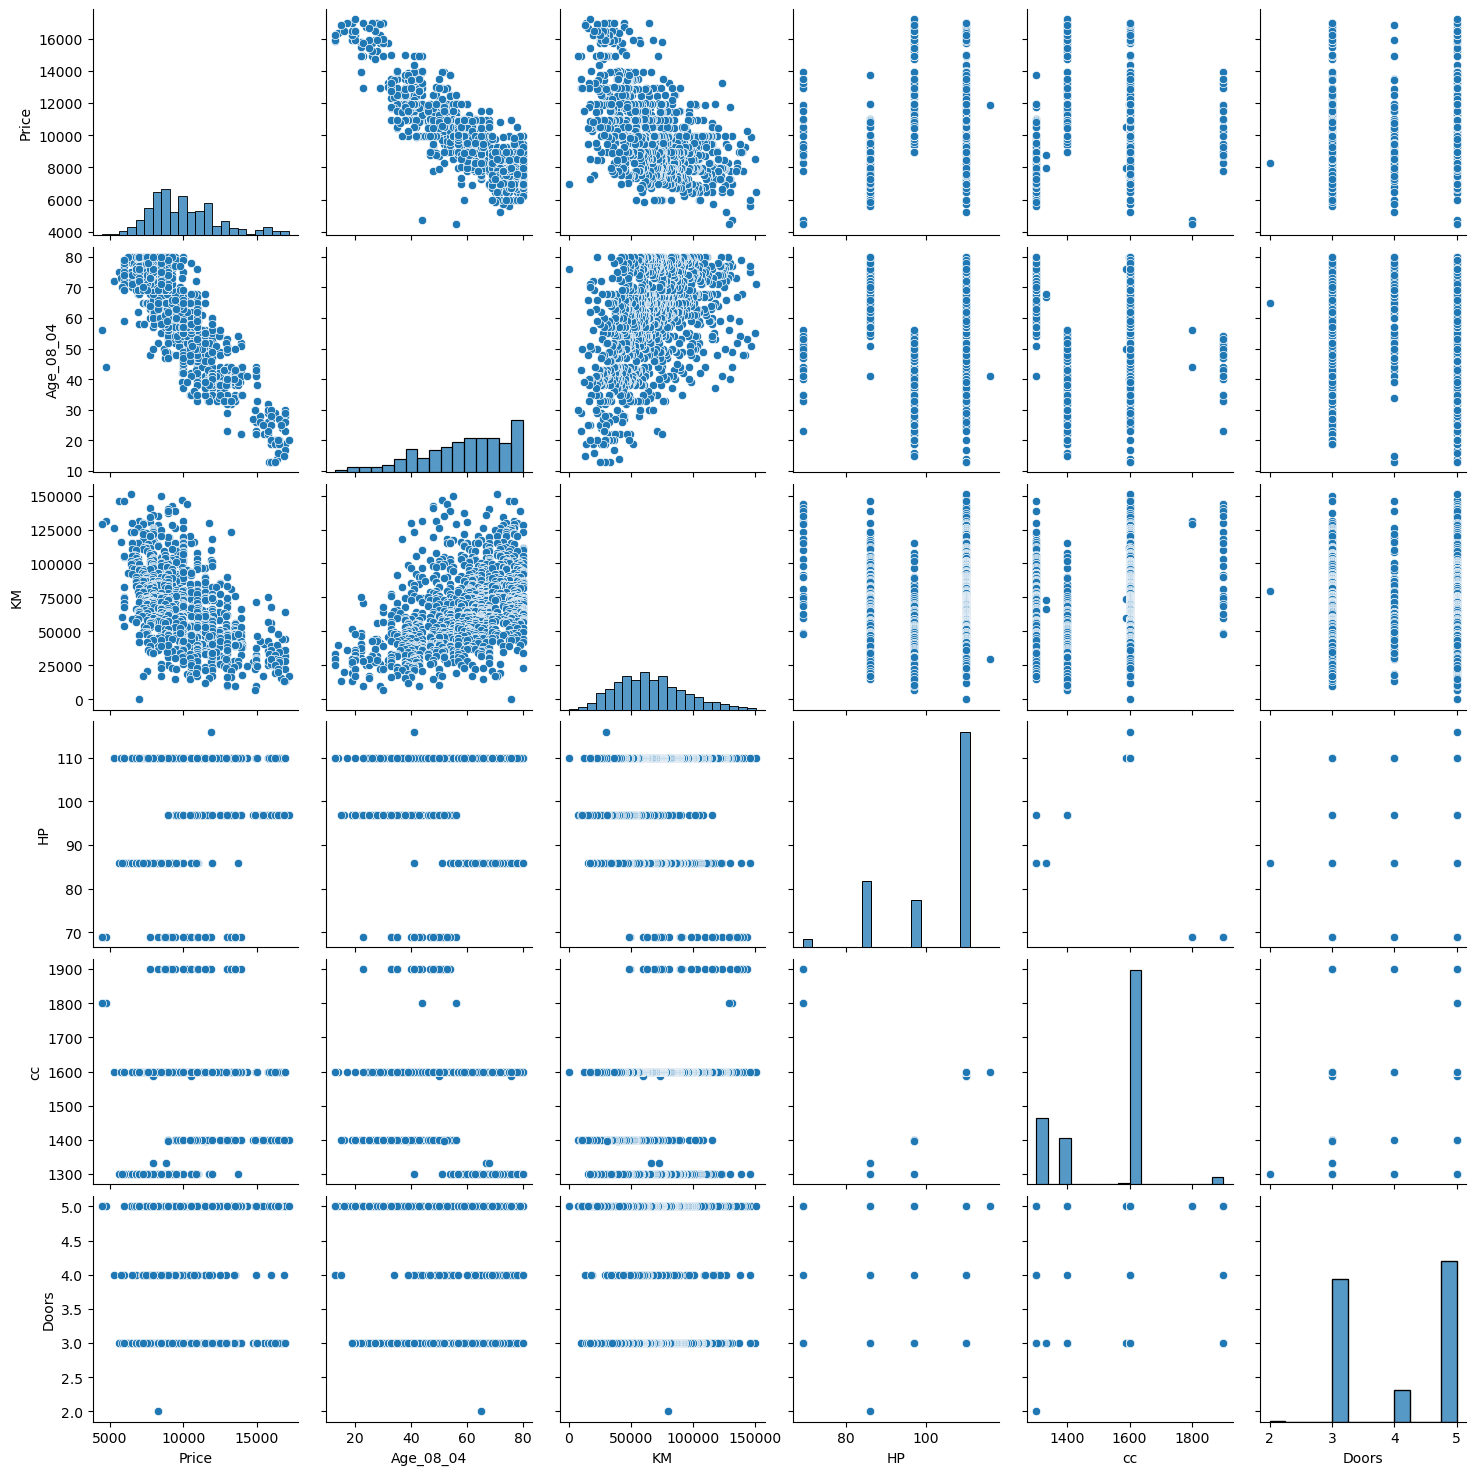

In [33]:
sns.pairplot(df_new)

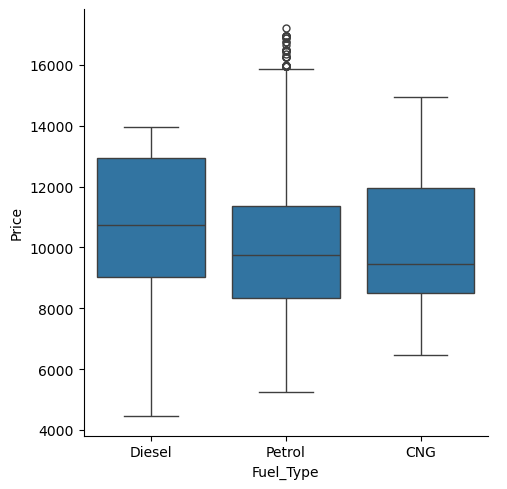

In [34]:
sns.catplot(data=df_new,y="Price",x="Fuel_Type",kind="box")

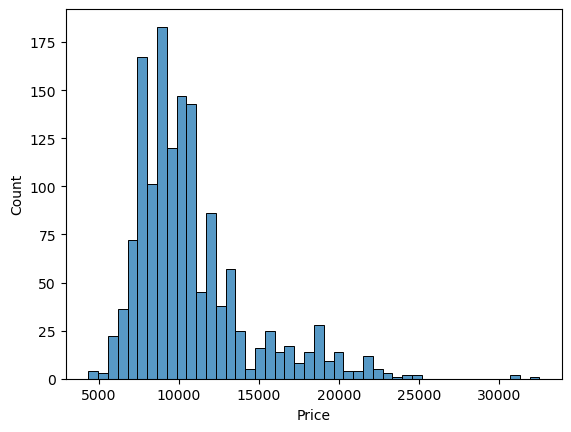

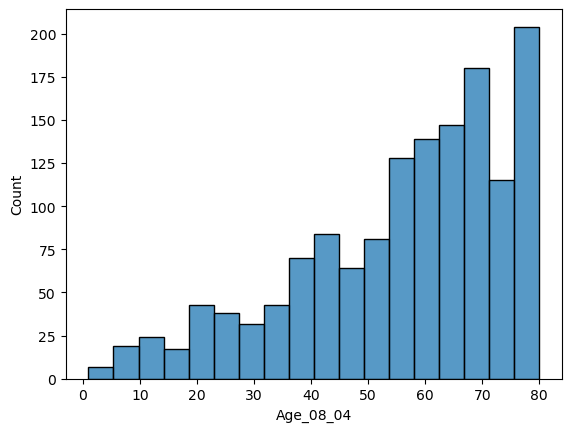

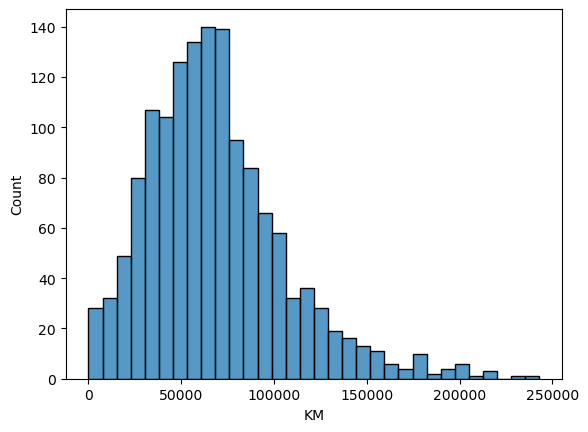

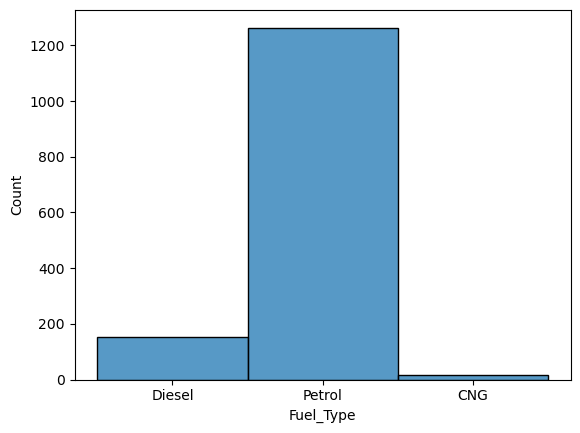

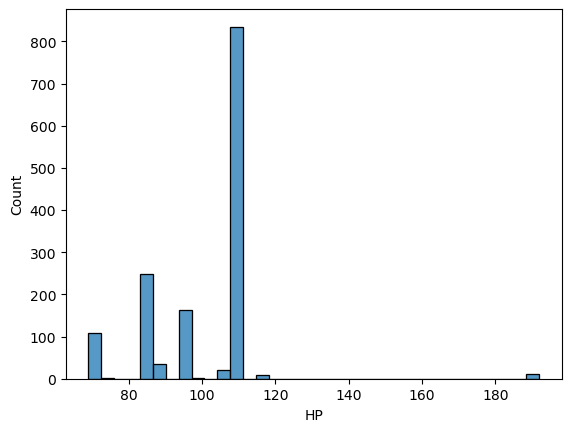

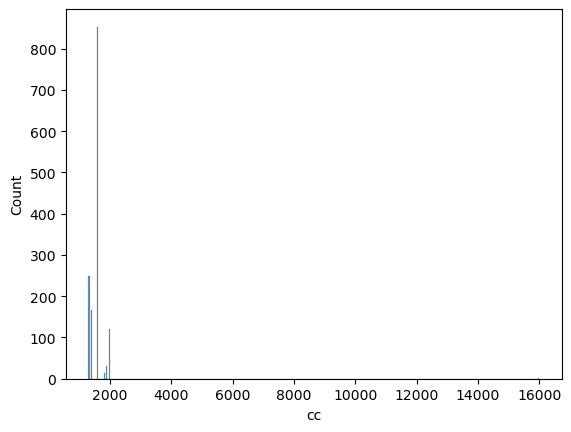

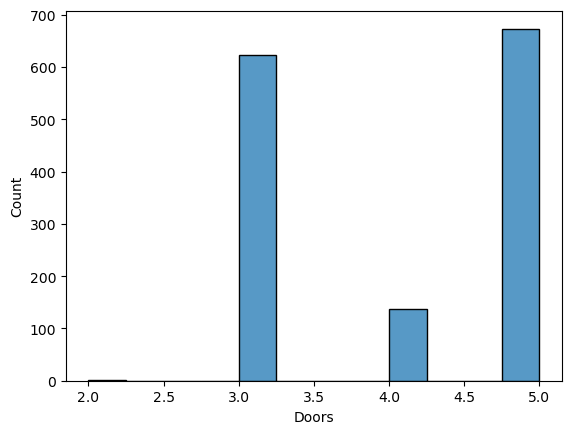

In [35]:
for i in df_new.columns:
    sns.histplot(x=df[i])
    plt.xlabel(i)     
    plt.show()

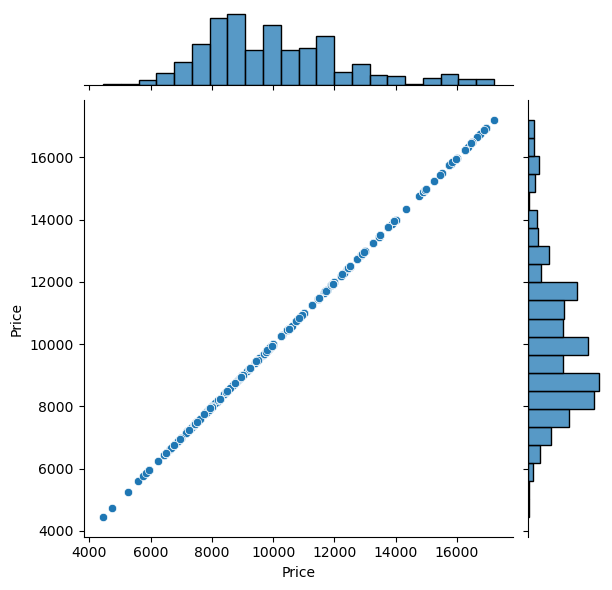

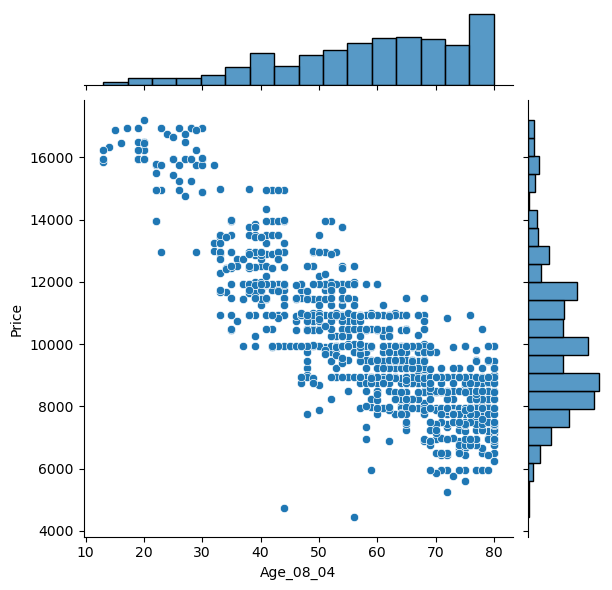

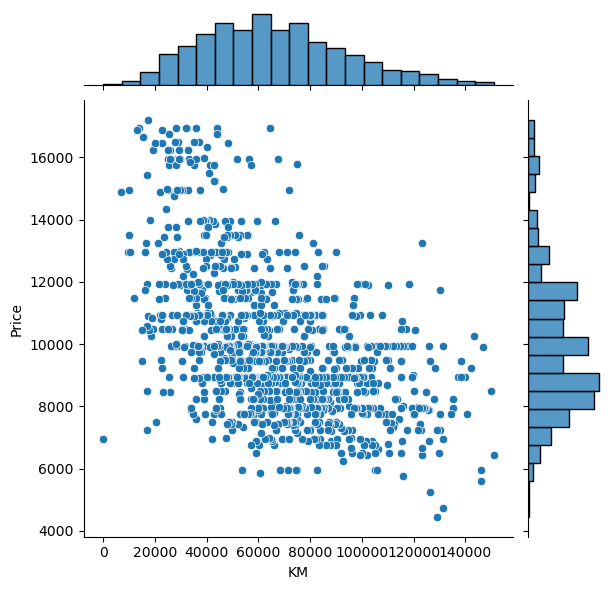

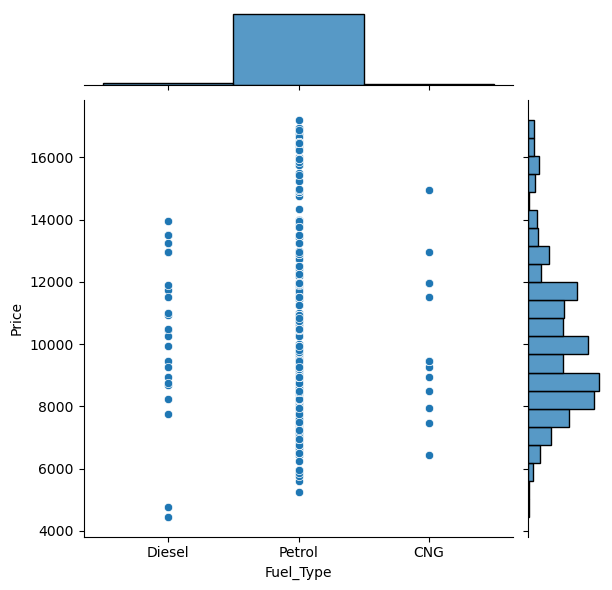

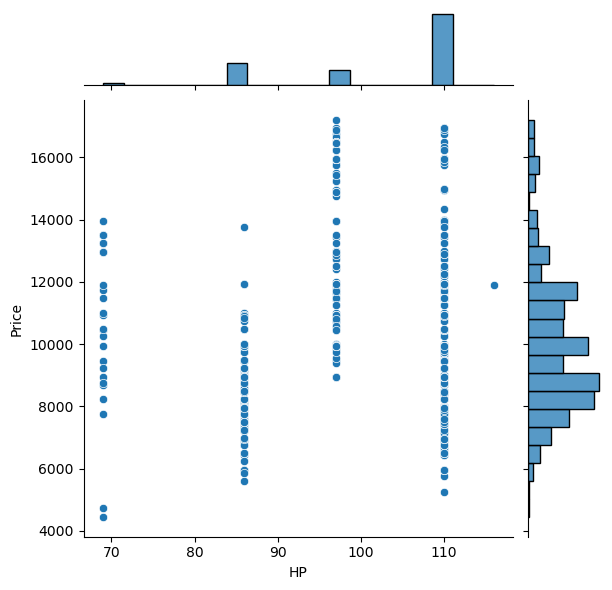

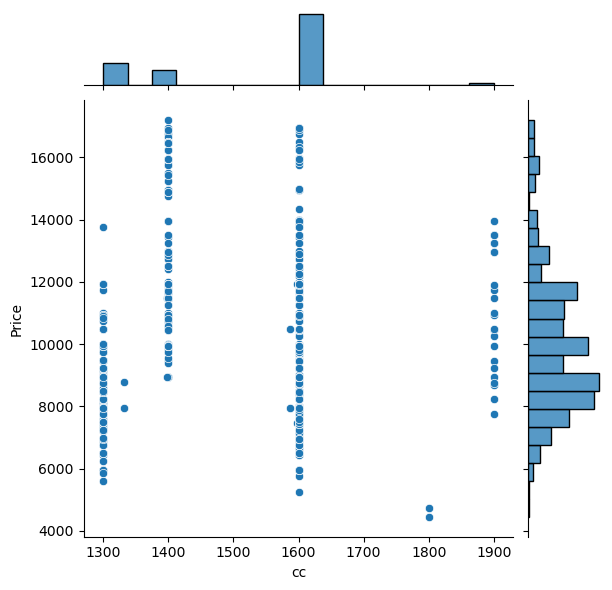

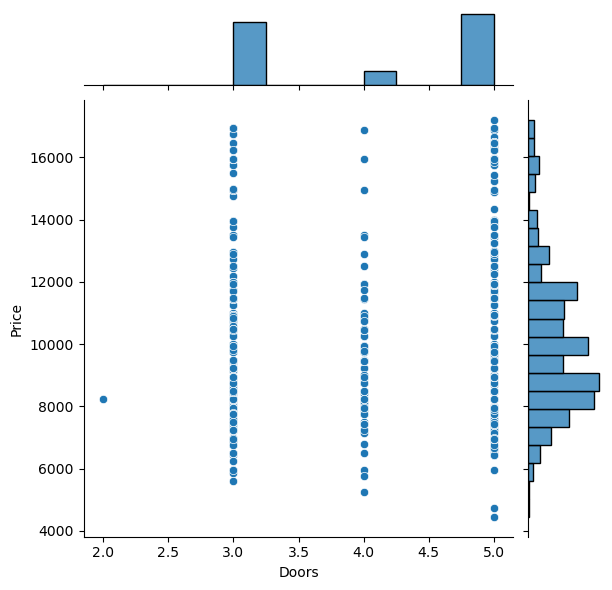

In [36]:
for i in df_new.columns:
    sns.jointplot(data=df_new,x=i,y="Price")
    

#### Seperating feature and target dataset

In [38]:
feature=df_new.drop(columns="Price")
feature

,Age_08_04,KM,Fuel_Type,HP,cc,Doors
9,23,71138,Diesel,69,1900,3
18,24,25563,Petrol,110,1600,3
19,30,64359,Petrol,110,1600,3
20,30,67660,Petrol,110,1600,3
22,28,56349,Petrol,110,1600,3
...,...,...,...,...,...,...
1431,69,20544,Petrol,86,1300,3
1432,72,19000,Petrol,86,1300,3
1433,71,17016,Petrol,86,1300,3
1434,70,16916,Petrol,86,1300,3


In [39]:
target=df_new[["Price"]]
target

,Price
9,12950
18,16750
19,16950
20,15950
22,15950
...,...
1431,7500
1432,10845
1433,8500
1434,7250


### Seperating the numerical_column and categorical column from feature dataset to perform labelling and scaling

In [41]:
num_col=feature._get_numeric_data()
num_col

,Age_08_04,KM,HP,cc,Doors
9,23,71138,69,1900,3
18,24,25563,110,1600,3
19,30,64359,110,1600,3
20,30,67660,110,1600,3
22,28,56349,110,1600,3
...,...,...,...,...,...
1431,69,20544,86,1300,3
1432,72,19000,86,1300,3
1433,71,17016,86,1300,3
1434,70,16916,86,1300,3


In [42]:
cat_col=feature[["Fuel_Type"]]
cat_col

,Fuel_Type
9,Diesel
18,Petrol
19,Petrol
20,Petrol
22,Petrol
...,...
1431,Petrol
1432,Petrol
1433,Petrol
1434,Petrol


#### Performing scaling  using StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
std=StandardScaler()
features=pd.DataFrame(std.fit_transform(num_col),columns=num_col.columns)
features

,Age_08_04,KM,HP,cc,Doors
0,-2.288994,0.184006,-3.052238,2.762203,-1.105551
1,-2.224668,-1.453622,0.683134,0.581673,-1.105551
2,-1.838717,-0.059581,0.683134,0.581673,-1.105551
3,-1.838717,0.059032,0.683134,0.581673,-1.105551
4,-1.967368,-0.347401,0.683134,0.581673,-1.105551
...,...,...,...,...,...
1093,0.669967,-1.633968,-1.503425,-1.598857,-1.105551
1094,0.862942,-1.689447,-1.503425,-1.598857,-1.105551
1095,0.798617,-1.760738,-1.503425,-1.598857,-1.105551
1096,0.734292,-1.764331,-1.503425,-1.598857,-1.105551


##### Performing labelling using Ordinal Encoder

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
ordinal=OrdinalEncoder(categories=[["CNG","Diesel","Petrol"]])

#### Combaining the sacled and labelled data together and storing in features

In [50]:
features["Fuel_Type"]=ordinal.fit_transform(cat_col)
features

,Age_08_04,KM,HP,cc,Doors,Fuel_Type
0,-2.288994,0.184006,-3.052238,2.762203,-1.105551,1.0
1,-2.224668,-1.453622,0.683134,0.581673,-1.105551,2.0
2,-1.838717,-0.059581,0.683134,0.581673,-1.105551,2.0
3,-1.838717,0.059032,0.683134,0.581673,-1.105551,2.0
4,-1.967368,-0.347401,0.683134,0.581673,-1.105551,2.0
...,...,...,...,...,...,...
1093,0.669967,-1.633968,-1.503425,-1.598857,-1.105551,2.0
1094,0.862942,-1.689447,-1.503425,-1.598857,-1.105551,2.0
1095,0.798617,-1.760738,-1.503425,-1.598857,-1.105551,2.0
1096,0.734292,-1.764331,-1.503425,-1.598857,-1.105551,2.0


### Model1

In [52]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=.80,random_state=100)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(878, 6)
(220, 6)
(878, 1)
(220, 1)


In [54]:
multi_lin=LinearRegression()

In [55]:
multi_lin.fit(x_train,y_train)

LinearRegression()

In [56]:
### Finding the y values based on x_train
y_pred=multi_lin.predict(x_train)
y_pred

array([[ 9447.5302608 ],
       [10952.11020561],
       [ 9748.14352266],
       [12742.66608935],
       [ 7670.89902628],
       [ 7403.37161715],
       [ 7435.39704959],
       [ 9209.57739036],
       [ 8007.43021891],
       [ 9364.09642255],
       [ 7631.04223552],
       [ 8158.42443036],
       [13573.40479331],
       [11195.5110852 ],
       [12520.8111875 ],
       [13106.29729637],
       [ 7050.31133762],
       [ 8619.79522775],
       [11318.36286942],
       [13087.31448382],
       [12694.28857073],
       [10673.3622189 ],
       [ 8296.59261854],
       [ 9042.09268527],
       [13331.64764101],
       [ 9530.75589825],
       [ 8542.10375143],
       [ 9802.55181479],
       [ 8240.55943597],
       [ 9761.77508217],
       [ 9980.61996049],
       [ 7763.34228838],
       [10601.02049442],
       [ 9520.63542013],
       [12397.97748238],
       [ 9910.25731867],
       [12404.0002749 ],
       [ 7317.033157  ],
       [11612.05885361],
       [ 9628.58240517],


In [57]:
### Finding the y values based on x_test
y_pred1=multi_lin.predict(x_test)
y_pred1

array([[12884.85497206],
       [ 8137.63357868],
       [13756.08196728],
       [ 6764.89510087],
       [ 9135.70667642],
       [ 7455.3930082 ],
       [13014.67406294],
       [11635.42246118],
       [14589.11498244],
       [12230.49015395],
       [ 9804.81670615],
       [12990.33146278],
       [ 7008.16552849],
       [ 7246.42427489],
       [10158.73275708],
       [ 9620.69953045],
       [13171.23821228],
       [ 9653.5976858 ],
       [ 7753.26977474],
       [ 9242.40286022],
       [11063.98805892],
       [10119.26849501],
       [ 9751.87481014],
       [ 8171.50033104],
       [13928.49293781],
       [ 7365.97615804],
       [ 8139.33751408],
       [ 8123.12100668],
       [10364.86320021],
       [15744.6851648 ],
       [ 9862.53414303],
       [15065.73514322],
       [12794.29922771],
       [ 7921.64177609],
       [ 8176.08528351],
       [10968.93132059],
       [ 8949.00002639],
       [ 9356.75310682],
       [14000.05864001],
       [ 7746.87252717],


In [58]:
### r2 score of training the model
r2_score(y_train,y_pred)

0.7892651407624285

In [59]:
### r2 score of testing the model
r2_score(y_test,y_pred1)

0.78980492491224

In [60]:
round(mean_absolute_error(y_test,y_pred1),2)

831.12

In [61]:
round(mean_squared_error(y_test,y_pred1),2)

1096727.29

<Axes: xlabel='Price'>

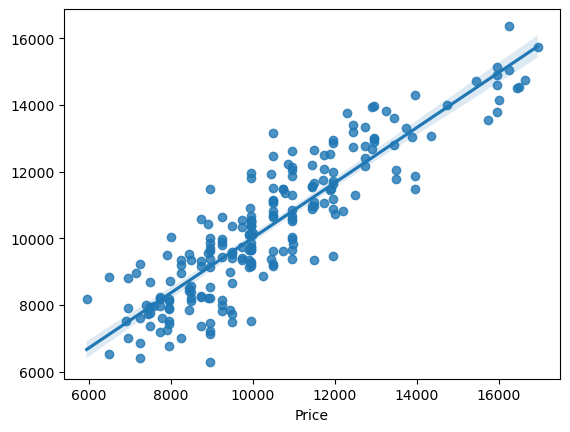

In [62]:
sns.regplot(data=df_new,x=y_test,y=y_pred1)

###### Coefficent and Intercept of model 3

In [64]:
print("Coefficent=",multi_lin.coef_)
print("Intercept=",multi_lin.intercept_)

Coefficent= [[-1835.6724373   -405.8342712    294.42365178    -4.71901355
    164.65532284   -53.00648453]]
Intercept= [10140.36651562]


##### Model 1 r2_Score of training and testing are almost equal. So model 1 is good to predict target value Price

### Model 2

In [67]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=.75,random_state=100)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 6)
(275, 6)
(823, 1)
(275, 1)


In [69]:
multi_lin=LinearRegression()

In [70]:
multi_lin.fit(x_train,y_train)

LinearRegression()

In [71]:
### Finding the y values based on x_train
y_pred=multi_lin.predict(x_train)
y_pred

array([[ 8544.95932292],
       [ 9264.83564401],
       [ 8800.36598576],
       [ 9090.28324395],
       [ 9296.90480644],
       [ 9388.12660424],
       [11520.23466462],
       [ 9219.68775786],
       [ 8280.8914657 ],
       [12288.67903064],
       [12382.62640571],
       [ 7409.95897228],
       [13678.39050742],
       [ 7807.58695245],
       [ 9963.69112327],
       [10430.73595076],
       [ 7070.02608503],
       [ 9344.01322731],
       [ 7326.03203544],
       [ 7971.25030887],
       [12108.90897466],
       [10033.35122839],
       [ 7954.18771862],
       [10817.64204484],
       [10223.94455875],
       [ 6848.69257972],
       [12794.82462103],
       [ 7683.01807575],
       [ 6989.30651774],
       [ 7975.99325358],
       [ 6870.677242  ],
       [ 8319.23920612],
       [12849.48429612],
       [ 7625.17295173],
       [ 8302.01453639],
       [ 9783.81006404],
       [14816.11370067],
       [13036.90095325],
       [12554.19447167],
       [13486.76214639],


In [72]:
### Finding the y values based on x_test
y_pred1=multi_lin.predict(x_test)
y_pred1

array([[12897.95461719],
       [ 8129.16862643],
       [13772.66063207],
       [ 6740.8932244 ],
       [ 9122.13880812],
       [ 7442.24851542],
       [13028.39039332],
       [11645.95089459],
       [14608.54301919],
       [12239.26880913],
       [ 9815.37013371],
       [13005.78711168],
       [ 6996.44668732],
       [ 7220.378969  ],
       [10171.72633117],
       [ 9624.81399491],
       [13186.21195324],
       [ 9642.46561417],
       [ 7740.78548485],
       [ 9230.43502141],
       [11077.51038757],
       [10125.38716413],
       [ 9756.63625273],
       [ 8176.63441399],
       [13948.92270624],
       [ 7348.55132843],
       [ 8124.06146172],
       [ 8115.75918445],
       [10355.92017946],
       [15769.15393934],
       [ 9858.35208982],
       [15095.80933332],
       [12812.268638  ],
       [ 7912.96169952],
       [ 8169.90651197],
       [10966.81222316],
       [ 8946.12324656],
       [ 9354.97186158],
       [14024.59349065],
       [ 7732.00561715],


In [73]:
### r2 score of training the model
r2_score(y_train,y_pred)

0.7932283683870843

In [74]:
### r2 score of testing the model
r2_score(y_test,y_pred1)

0.7757921574287289

In [75]:
round(mean_absolute_error(y_test,y_pred1),2)

833.36

In [76]:
round(mean_squared_error(y_test,y_pred1),2)

1105248.22

<Axes: xlabel='Price'>

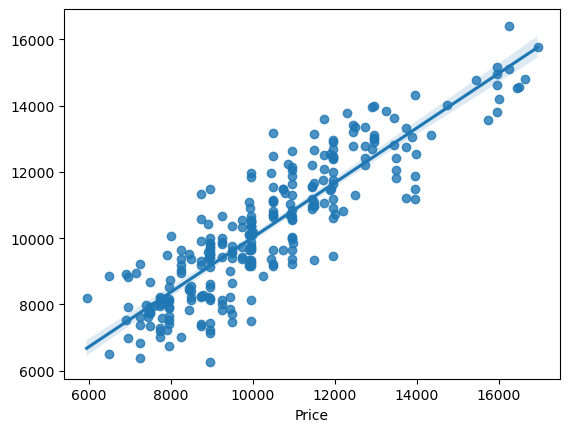

In [77]:
sns.regplot(data=df_new,x=y_test,y=y_pred1)

###### Coefficent and Intercept of model 2

In [79]:
print("Coefficent=",multi_lin.coef_)
print("Intercept=",multi_lin.intercept_)

Coefficent= [[-1841.18307116  -414.89929665   298.28356599    -9.01715105
    165.05414838   -79.79891942]]
Intercept= [10193.37182006]


##### Model 2 r2_Score of training is more compare to testing but there is no large difference.

### Model 3

In [82]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=.70,random_state=100)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 6)
(330, 6)
(768, 1)
(330, 1)


In [84]:
multi_lin=LinearRegression()

In [85]:
multi_lin.fit(x_train,y_train)

LinearRegression()

In [86]:
### Finding the y values based on x_train
y_pred=multi_lin.predict(x_train)
y_pred

array([[13743.97881687],
       [11336.50388948],
       [ 9299.66172737],
       [11487.13635821],
       [ 9131.75962903],
       [ 8523.73940373],
       [10911.63992838],
       [ 7844.92975627],
       [10317.50639143],
       [11031.70355637],
       [ 8014.53739388],
       [ 8892.2973325 ],
       [ 8385.82444372],
       [ 8415.56842666],
       [10380.36411883],
       [11956.74948906],
       [ 8500.82905467],
       [ 8679.19017983],
       [ 7909.89232022],
       [ 8141.9395426 ],
       [10897.05087783],
       [12974.06820229],
       [ 9149.75946707],
       [14968.19085356],
       [ 8690.53839684],
       [12789.99681376],
       [ 8287.87788385],
       [ 7813.05861996],
       [16337.14097008],
       [ 7866.07672788],
       [ 7822.93818588],
       [ 8897.10993399],
       [ 9283.1730627 ],
       [10113.50305125],
       [14273.67985435],
       [ 7154.57474065],
       [12625.72489057],
       [10238.97799861],
       [ 8765.40965785],
       [ 8292.52257881],


In [87]:
### Finding the y values based on x_test
y_pred1=multi_lin.predict(x_test)
y_pred1

array([[12937.38179367],
       [ 8139.48075671],
       [13816.40302574],
       [ 6708.3433987 ],
       [ 9117.87119551],
       [ 7430.51875898],
       [13068.6717003 ],
       [11664.19312055],
       [14635.19570076],
       [12267.9746025 ],
       [ 9852.87001831],
       [13049.89294887],
       [ 6989.4006127 ],
       [ 7188.53400757],
       [10206.34507899],
       [ 9656.77230673],
       [13221.00404466],
       [ 9641.55307288],
       [ 7743.85685241],
       [ 9354.57994046],
       [11124.44615452],
       [10159.84347199],
       [ 9789.50885203],
       [ 8201.57360582],
       [14000.31279872],
       [ 7327.9509707 ],
       [ 8119.73626166],
       [ 8114.03087548],
       [10357.13168744],
       [15822.63669282],
       [ 9871.61172635],
       [15143.60363613],
       [12854.86222468],
       [ 7915.97192104],
       [ 8170.52755952],
       [10967.92463973],
       [ 8961.68694987],
       [ 9375.22220178],
       [14064.35160984],
       [ 7722.35922866],


In [88]:
### r2 score of training the model
r2_score(y_train,y_pred)

0.794429821980193

In [89]:
### r2 score of testing the model
r2_score(y_test,y_pred1)

0.7767980425765355

In [90]:
round(mean_absolute_error(y_test,y_pred1),2)

832.1

In [91]:
round(mean_squared_error(y_test,y_pred1),2)

1089477.54

<Axes: xlabel='Price'>

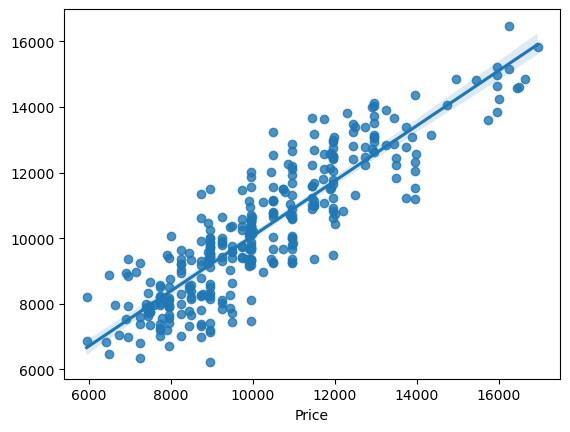

In [92]:
sns.regplot(data=df_new,x=y_test,y=y_pred1)

###### Coefficent and Intercept of model 3

In [94]:
print("Coefficent=",multi_lin.coef_)
print("Intercept=",multi_lin.intercept_)

Coefficent= [[-1846.36636992  -432.90104134   276.20859271    14.28413375
    168.94046888   -82.17431431]]
Intercept= [10215.98549679]


##### Model 3 r2_Score of training and testing are almost equal. So model 3 is good to predict target value Price

## Based on model 1,model 2,model 3, model 1 is good model to predict the target value Price

## Lasso

In [98]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [99]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=.80,random_state=100)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(878, 6)
(220, 6)
(878, 1)
(220, 1)


In [101]:
lasso=Lasso()
lasso

Lasso()

In [102]:
params = {'alpha': [1,2,3,4,5,6,7,8,9,10]}

In [103]:
### performing grid search to find the alpha value

In [104]:
grid_search = GridSearchCV(lasso,params)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [106]:
grid_search.best_params_

{'alpha': 10}

In [107]:
lasso.alpha=10

In [108]:
lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [109]:
y_pred1=lasso.predict(x_train)
y_pred

array([[13743.97881687],
       [11336.50388948],
       [ 9299.66172737],
       [11487.13635821],
       [ 9131.75962903],
       [ 8523.73940373],
       [10911.63992838],
       [ 7844.92975627],
       [10317.50639143],
       [11031.70355637],
       [ 8014.53739388],
       [ 8892.2973325 ],
       [ 8385.82444372],
       [ 8415.56842666],
       [10380.36411883],
       [11956.74948906],
       [ 8500.82905467],
       [ 8679.19017983],
       [ 7909.89232022],
       [ 8141.9395426 ],
       [10897.05087783],
       [12974.06820229],
       [ 9149.75946707],
       [14968.19085356],
       [ 8690.53839684],
       [12789.99681376],
       [ 8287.87788385],
       [ 7813.05861996],
       [16337.14097008],
       [ 7866.07672788],
       [ 7822.93818588],
       [ 8897.10993399],
       [ 9283.1730627 ],
       [10113.50305125],
       [14273.67985435],
       [ 7154.57474065],
       [12625.72489057],
       [10238.97799861],
       [ 8765.40965785],
       [ 8292.52257881],


In [110]:
y_pred=lasso.predict(x_test)
y_pred

array([12861.00059613,  8131.63187362, 13729.53245005,  6812.87151391,
        9137.65526239,  7491.39593953, 12990.29872403, 11639.9957776 ,
       14588.06723984, 12218.41640735,  9794.00950761, 12963.80099051,
        7041.65158226,  7275.57264543, 10167.73903831,  9602.02489762,
       13160.97485224,  9653.49756834,  7751.47447125,  9256.97411763,
       11036.42245259, 10099.03538793,  9732.64480579,  8186.56180686,
       13897.56909635,  7407.02047015,  8141.61080225,  8153.27364604,
       10363.35366195, 15712.04567445,  9854.36025357, 15052.59483419,
       12779.73566584,  7930.88612706,  8204.89413994, 10972.33026869,
        8945.31857134,  9344.77518958, 13991.77420563,  7763.32377695,
       11484.83625013,  9719.36079725,  9664.10585472,  7458.07977219,
       12166.13742791, 14304.46558308, 14516.91877334,  9425.63800846,
       12028.82480593, 10896.69136984, 11049.23352046,  9485.92296651,
       10678.59804545,  7848.86876563, 12848.36917168,  6573.37753562,
      

In [111]:
r2_score(y_test,y_pred)

0.7910978077193148

In [112]:
r2_score(y_train,y_pred1)

0.7891872893165104

In [113]:
lasso.coef_

array([-1832.20372586,  -395.53764867,   280.61172634,     0.        ,
         157.15077823,    -0.        ])

<Axes: xlabel='Price'>

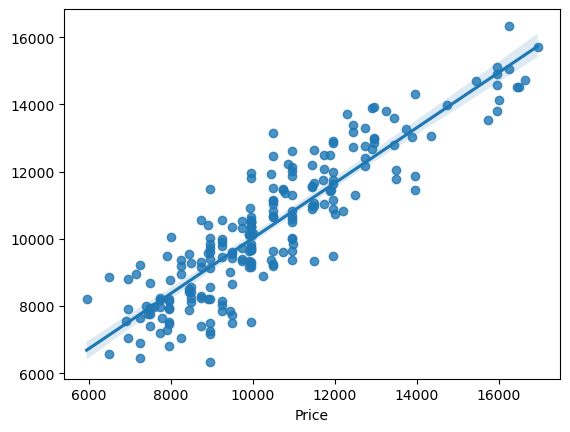

In [114]:
sns.regplot(data=df_new,x=y_test,y=y_pred)

In [115]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=.80,random_state=100)

In [116]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(878, 6)
(220, 6)
(878, 1)
(220, 1)


In [117]:
ridge=Ridge()
ridge

Ridge()

In [118]:
params = {'alpha': [1,2,3,4,5,6,7,8,9,10]}

In [119]:
grid_search = GridSearchCV(ridge,params)

In [120]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [121]:
grid_search.best_params_

{'alpha': 10}

In [122]:
ridge.alpha=10

In [123]:
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [124]:
y_pred1=ridge.predict(x_train)
y_pred

array([12861.00059613,  8131.63187362, 13729.53245005,  6812.87151391,
        9137.65526239,  7491.39593953, 12990.29872403, 11639.9957776 ,
       14588.06723984, 12218.41640735,  9794.00950761, 12963.80099051,
        7041.65158226,  7275.57264543, 10167.73903831,  9602.02489762,
       13160.97485224,  9653.49756834,  7751.47447125,  9256.97411763,
       11036.42245259, 10099.03538793,  9732.64480579,  8186.56180686,
       13897.56909635,  7407.02047015,  8141.61080225,  8153.27364604,
       10363.35366195, 15712.04567445,  9854.36025357, 15052.59483419,
       12779.73566584,  7930.88612706,  8204.89413994, 10972.33026869,
        8945.31857134,  9344.77518958, 13991.77420563,  7763.32377695,
       11484.83625013,  9719.36079725,  9664.10585472,  7458.07977219,
       12166.13742791, 14304.46558308, 14516.91877334,  9425.63800846,
       12028.82480593, 10896.69136984, 11049.23352046,  9485.92296651,
       10678.59804545,  7848.86876563, 12848.36917168,  6573.37753562,
      

In [125]:
y_pred=ridge.predict(x_test)
y_pred

array([[12859.15047896],
       [ 8165.34300859],
       [13719.67971287],
       [ 6771.67069805],
       [ 9134.16385405],
       [ 7468.83848065],
       [12987.55933831],
       [11611.54122441],
       [14523.55095618],
       [12206.38370956],
       [ 9828.68642823],
       [12966.95024922],
       [ 7033.10860661],
       [ 7252.36877047],
       [10167.67797804],
       [ 9642.64849174],
       [13136.89796385],
       [ 9646.38342279],
       [ 7781.05239688],
       [ 9266.83760309],
       [11075.03069986],
       [10135.12041835],
       [ 9772.44341202],
       [ 8204.98884609],
       [13895.88829628],
       [ 7373.18239516],
       [ 8154.27539459],
       [ 8134.19542522],
       [10347.69747562],
       [15683.76980962],
       [ 9864.19171581],
       [15010.6693982 ],
       [12773.00479556],
       [ 7946.72865398],
       [ 8188.32632051],
       [10941.04369297],
       [ 8967.89551995],
       [ 9372.88824818],
       [13955.67730496],
       [ 7763.84015382],


In [126]:
r2_score(y_test,y_pred)

0.7902136338077865

In [127]:
r2_score(y_train,y_pred1)

0.7891696101080498

In [128]:
ridge.coef_

array([[-1809.7292393 ,  -414.77338597,   284.03831706,     4.89076342,
          165.23513015,   -44.83927349]])

<Axes: xlabel='Price'>

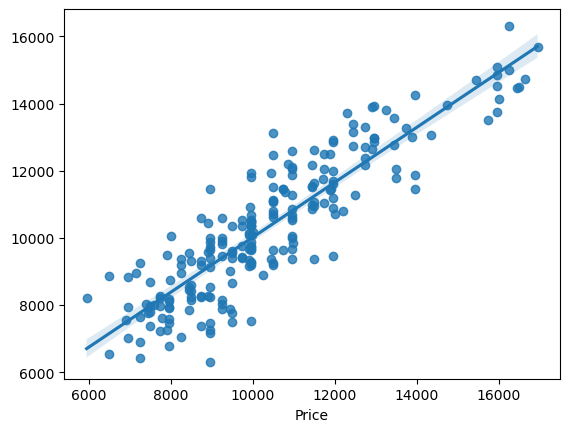

In [129]:
sns.regplot(data=df_new,x=y_test,y=y_pred)

In [235]:
### Here lasso and Ridge is performed based on model 1 . If we compare r2_score of traning a of 3 of these model, Lasso and ridge value r2_score is less

In [2]:
### Interview Question

What is Normalization & Standardization and how is it helpful?
Normalization scales the data to a fixed range, typically [0,1] or [-1,1]. It is also known as Min-Max Scaling.
x_norm=(x-x_min)/(x_max-x_min)
x is the original value,
x_min is the minimum value in the dataset,
x_max is the maximum value in the dataset.

Standardization (Z-score normalization) transforms the data to have zero mean and unit variance. It lies between [-3,+3].
x_stand=X-mu/std
mu= Mean of the feature,
std=Standard deviation of the feature

How it is helpful?
When features have different scales and need to be bounded within a range (e.g., neural networks, distance-based models like KNN).
When the dataset does not follow a normal distribution.

What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more predictor variables in a multiple linear regression model are highly correlated. 
We can fix this issue using following steps:
corrrelation value of data set using corr() function
Develop heatmap based on this correlation value . If any of two feature has higher correlation drop any of these two features